In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

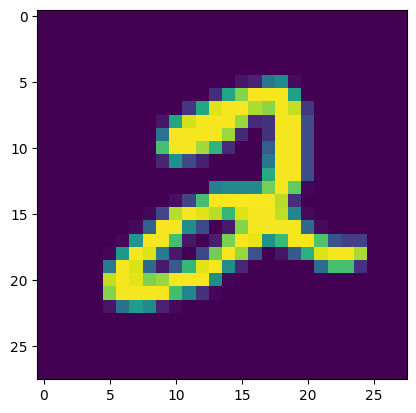

In [6]:
plt.imshow(x_train[5])

In [7]:
y_train[5]

2

In [8]:
x_train.max()

255

In [9]:
x_train.min()

0

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
x_train_flt = x_train.reshape(len(x_train), 28*28)
x_test_flt = x_test.reshape(len(x_test), 28*28)

In [12]:
x_test_flt.shape

(10000, 784)

In [13]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")])
model.compile("adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [15]:
model.fit(x_train_flt, y_train, epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2623 - accuracy: 0.9271
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2581 - accuracy: 0.9287
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2557 - accuracy: 0.9288
Epoch 4/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2529 - accuracy: 0.9303
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2509 - accuracy: 0.9309
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2491 - accuracy: 0.9312
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2479 - accuracy: 0.9310
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2465 - accuracy: 0.9318
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2454 - accuracy: 0.9332
Epoch 10/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.244

In [16]:
model.evaluate(x_test_flt, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.9273


[0.2713601887226105, 0.927299976348877]

In [17]:
y_pred = model.predict(x_test_flt)
y_pred[15]

313/313 [==============================] - 1s 2ms/step


array([1.2085876e-02, 2.1666942e-04, 4.2008273e-03, 7.7169430e-01,
       3.8351203e-04, 9.8240453e-01, 1.9657521e-03, 1.0057574e-08,
       7.0458013e-01, 3.5269939e-05], dtype=float32)

In [18]:
y_pred[15].argmax()

5

In [19]:
np.argmax(y_pred[15])

5

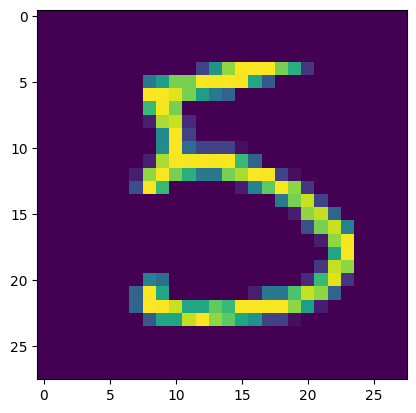

In [20]:
plt.imshow(x_test[15])

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
predictions = model.predict(x_test_flt)
pred_classes = predictions.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [23]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.91      0.92      0.91      1010
           4       0.93      0.95      0.94       982
           5       0.92      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [24]:
print(confusion_matrix(y_test, pred_classes))

[[ 965    0    0    2    1    5    3    3    1    0]
 [   0 1119    4    1    0    1    3    2    5    0]
 [   8   10  909   22   10    4   11    9   45    4]
 [   4    0   14  925    1   23    2   10   24    7]
 [   1    2    6    3  928    0    6    5    7   24]
 [  10    3    1   33   10  778   15    8   29    5]
 [  12    3    7    2    8   10  913    1    2    0]
 [   2    9   20    5    7    1    0  949    2   33]
 [   9   14    6   20    9   22    7   10  865   12]
 [  11    8    1    9   27    6    0   20    5  922]]


In [25]:
y_test[50:90]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1], dtype=uint8)

In [26]:
pred_classes[50:90]

array([6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 2, 4, 3, 0, 7, 0,
       2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1])

Text(191.44444444444443, 0.5, 'Actual')

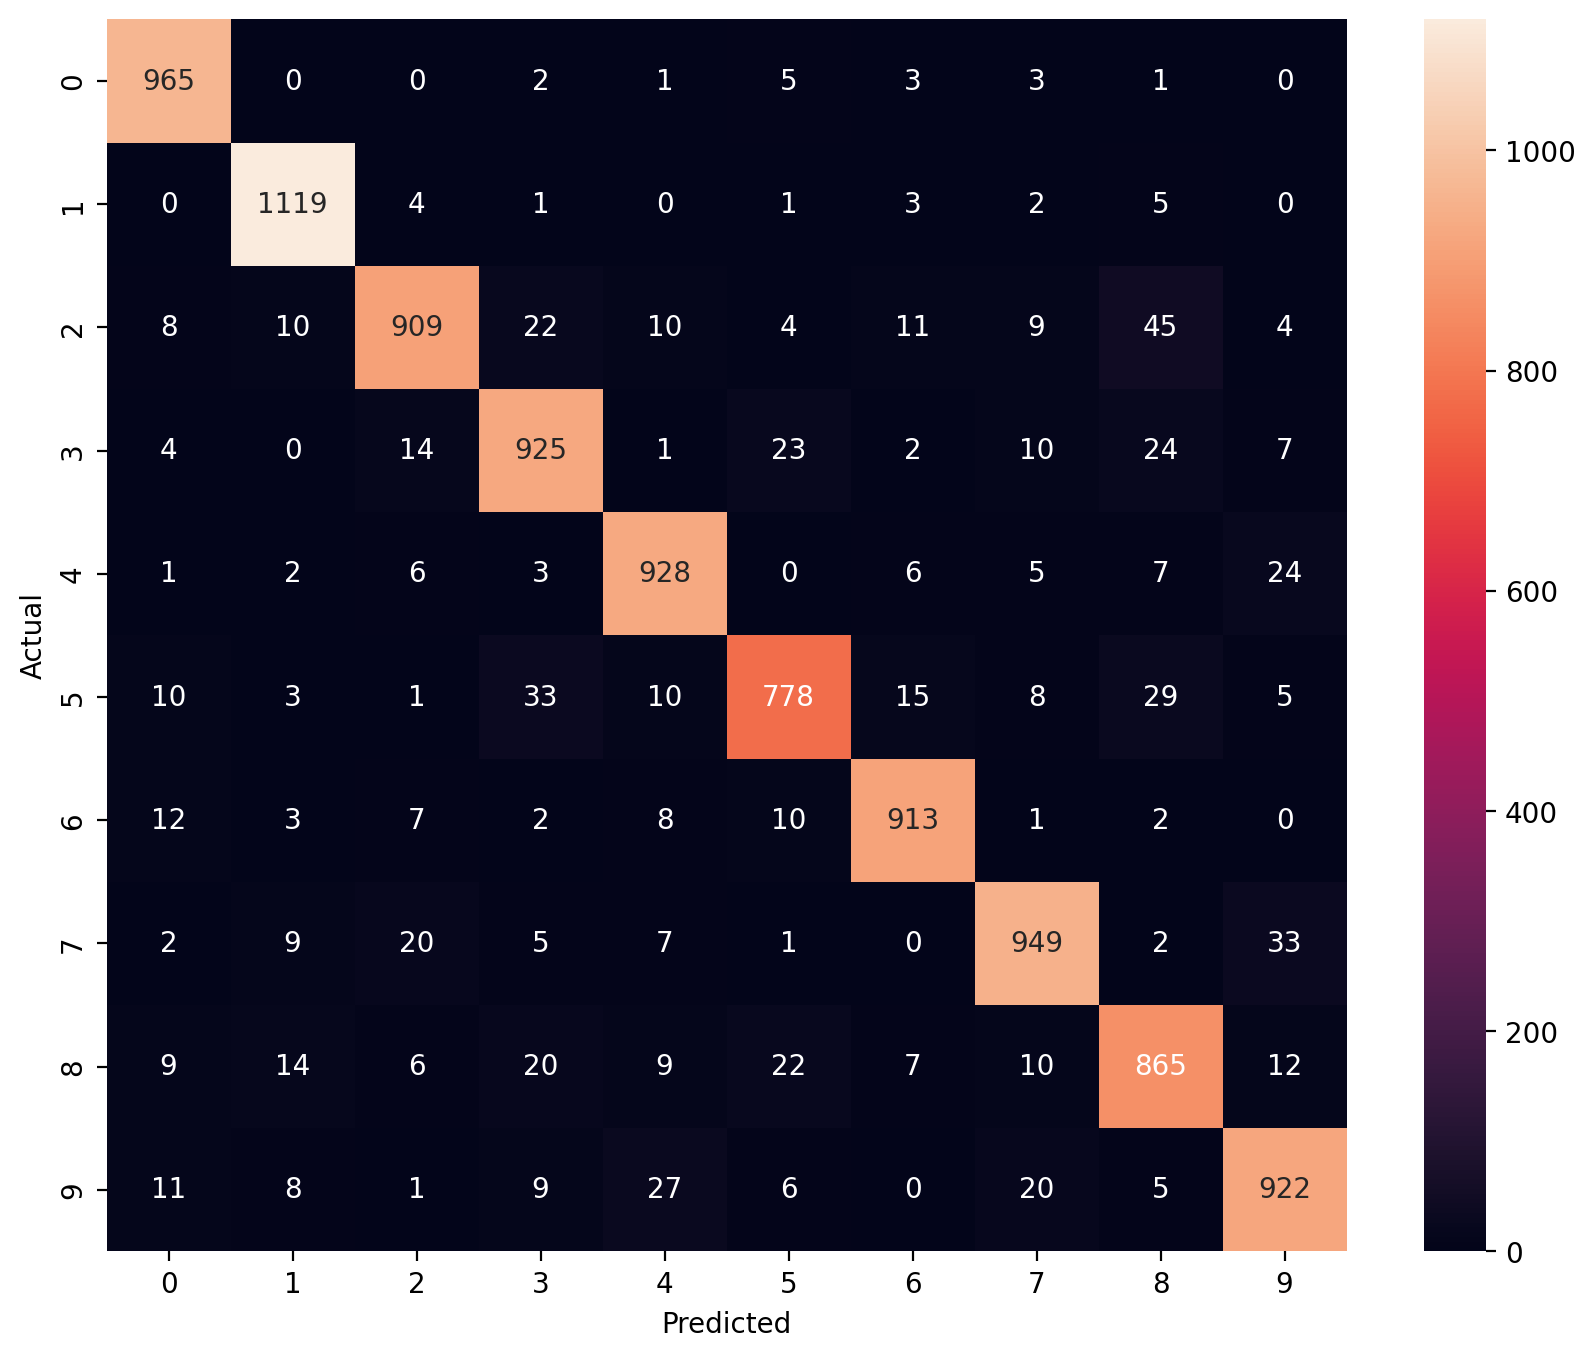

In [27]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(confusion_matrix(y_test, pred_classes), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [28]:
model = keras.Sequential([keras.layers.Dense(100, input_shape=(784,), activation="sigmoid"),
                          keras.layers.Dense(10, activation="sigmoid")])
model.compile("adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [29]:
model.fit(x_train_flt, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4141 - accuracy: 0.8948
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2059 - accuracy: 0.9414
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1544 - accuracy: 0.9560
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9644
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0998 - accuracy: 0.9717
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0844 - accuracy: 0.9764
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0715 - accuracy: 0.9797
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0608 - accuracy: 0.9837
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0528 - accuracy: 0.9858
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.045

In [30]:
model.evaluate(x_test_flt, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0806 - accuracy: 0.9753


[0.08055219054222107, 0.9753000140190125]

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test_flt)
pred_classes = predictions.argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [32]:
print(classification_report(y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.99      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.98      0.98     10000

